### 1- Importation des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split

### 2- Chargement des données d'un fichier CSV avec Pandas:

In [2]:
train=pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\GENIE LOGICIEL S4\CSE-CIC-IDS2018\CSE-CIC-IDS2018-3.csv')

### 3- Résumé sur l'ensemble de données

In [3]:
train.head(10)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,138.592929,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,263.750829,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0.0,2624734,2624734,9058214.0,0.0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,82.024387,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0.0,0,0,0.0,0.0,0,0,Benign
5,0,0,16/02/2018 08:35:50,112641178,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,5.656854,56300000,56300000,Benign
6,0,0,16/02/2018 08:38:39,112641264,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,7.071068,56300000,56300000,Benign
7,0,0,16/02/2018 08:41:28,112641525,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,17.67767,56300000,56300000,Benign
8,0,0,16/02/2018 08:44:17,112641414,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,63.63961,56300000,56300000,Benign
9,0,0,16/02/2018 08:47:06,112641379,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,30.405592,56300000,56300000,Benign


In [4]:
# permet de voir les colonnes 
train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [5]:
train.shape

(1048575, 80)

In [6]:
train = train.drop(columns=['Timestamp'])

In [7]:
train.dtypes

Dst Port         object
Protocol         object
Flow Duration    object
Tot Fwd Pkts     object
Tot Bwd Pkts     object
                  ...  
Idle Mean        object
Idle Std         object
Idle Max         object
Idle Min         object
Label            object
Length: 79, dtype: object

In [8]:
train.drop(train[train['Label'] == 'Label'].index, inplace=True)

<Axes: ylabel='proportion'>

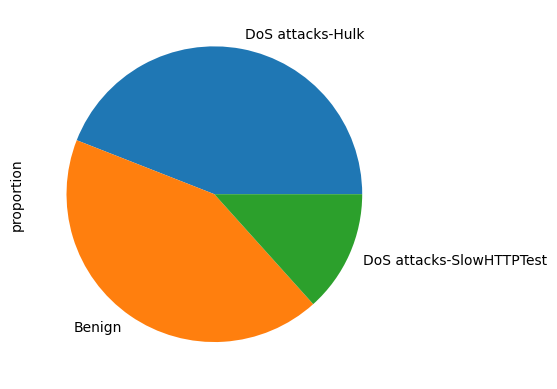

In [9]:
train["Label"].value_counts(normalize=True).plot(kind='pie')

Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64

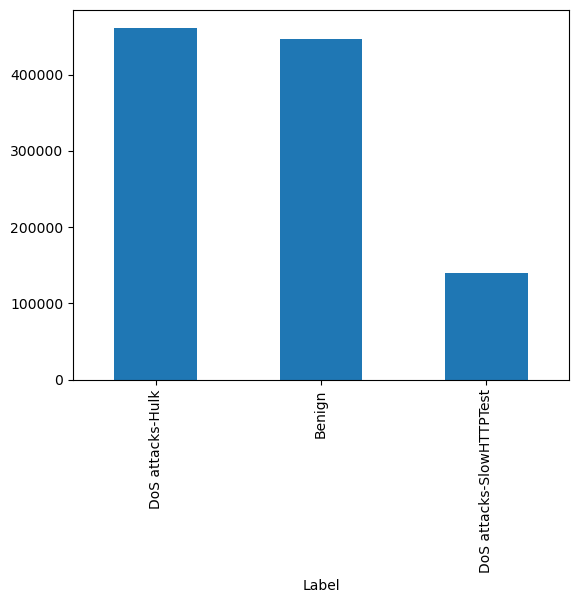

In [10]:
train["Label"].value_counts().plot.bar()
train['Label'].value_counts()

Protocol
6     1040250
6        8147
0         121
0          41
17         12
17          3
Name: count, dtype: int64

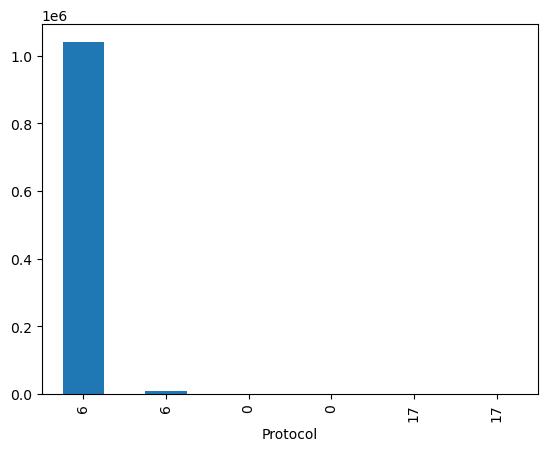

In [11]:
train.drop(train[train['Protocol'] == 'Protocol'].index, inplace=True)
train["Protocol"].value_counts().plot.bar()
train['Protocol'].value_counts()

In [12]:
# Créez une nouvelle colonne 'binary_labels' avec 0 pour 'normal' et 1 pour toutes les autres classes
train['Labels'] = train['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

In [13]:
train = train.drop(columns=['Label'])

In [14]:
train.head(10)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Labels
0,0,0,112640768,3,0,0,0,0,0,0.0,...,0,0,0.0,0,0,56300000.0,138.592929,56300000,56300000,0
1,0,0,112641773,3,0,0,0,0,0,0.0,...,0,0,0.0,0,0,56300000.0,263.750829,56300000,56300000,0
2,35605,6,20784143,23,44,2416,1344,240,64,105.043478,...,20,2624734,0.0,2624734,2624734,9058214.0,0.0,9058214,9058214,0
3,0,0,112640836,3,0,0,0,0,0,0.0,...,0,0,0.0,0,0,56300000.0,82.024387,56300000,56300000,0
4,23,6,20,1,1,0,0,0,0,0.0,...,20,0,0.0,0,0,0.0,0.0,0,0,0
5,0,0,112641178,3,0,0,0,0,0,0.0,...,0,0,0.0,0,0,56300000.0,5.656854,56300000,56300000,0
6,0,0,112641264,3,0,0,0,0,0,0.0,...,0,0,0.0,0,0,56300000.0,7.071068,56300000,56300000,0
7,0,0,112641525,3,0,0,0,0,0,0.0,...,0,0,0.0,0,0,56300000.0,17.67767,56300000,56300000,0
8,0,0,112641414,3,0,0,0,0,0,0.0,...,0,0,0.0,0,0,56300000.0,63.63961,56300000,56300000,0
9,0,0,112641379,3,0,0,0,0,0,0.0,...,0,0,0.0,0,0,56300000.0,30.405592,56300000,56300000,0


In [15]:
# Convertir les colonnes 'object' en numérique
colonnes_numeriques = train.columns[train.dtypes == 'object']
train[colonnes_numeriques] = train[colonnes_numeriques].apply(pd.to_numeric, errors='coerce')
# Vérifier s'il reste des colonnes non numériques
colonnes_non_numeriques = train.columns[train.dtypes == 'object']
print(colonnes_non_numeriques)

Index([], dtype='object')


In [ ]:
train.columns

# Prétraitements convenables des données .

## 1.standarisation

In [16]:
#train
Scaler=StandardScaler().fit(train)
Scaler.transform(train)

array([[-8.42428718e-01, -7.02533721e+01,  1.78414218e+01, ...,
         9.43095890e+00,  9.43180020e+00, -1.16060340e+00],
       [-8.42428718e-01, -7.02533721e+01,  1.78415845e+01, ...,
         9.43095890e+00,  9.43180020e+00, -1.16060340e+00],
       [ 6.55753313e-01,  9.01251674e-03,  2.97089447e+00, ...,
         1.40575462e+00,  1.40589986e+00, -1.16060340e+00],
       ...,
       [-8.41545083e-01,  9.01251674e-03, -3.93817900e-01, ...,
        -1.33010607e-01, -1.32998832e-01,  8.61620772e-01],
       [-8.41545083e-01,  9.01251674e-03, -3.93817576e-01, ...,
        -1.33010607e-01, -1.32998832e-01,  8.61620772e-01],
       [-8.41545083e-01,  9.01251674e-03, -3.93818062e-01, ...,
        -1.33010607e-01, -1.32998832e-01,  8.61620772e-01]])

## 2.normalisation

In [17]:
#train
Scaler=Normalizer().fit(train)
Scaler.transform(train)

array([[0.00000000e+00, 0.00000000e+00, 4.84799830e-01, ...,
        2.42312183e-01, 2.42312183e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.84803138e-01, ...,
        2.42311675e-01, 2.42311675e-01, 0.00000000e+00],
       [8.36527479e-04, 1.40967979e-07, 4.88316437e-01, ...,
        2.12819686e-01, 2.12819686e-01, 0.00000000e+00],
       ...,
       [2.57057129e-05, 7.34448941e-06, 3.67224471e-06, ...,
        0.00000000e+00, 0.00000000e+00, 1.22408157e-06],
       [4.28016757e-05, 1.22290502e-05, 1.01908752e-05, ...,
        0.00000000e+00, 0.00000000e+00, 2.03817503e-06],
       [1.71422991e-05, 4.89779975e-06, 1.63259992e-06, ...,
        0.00000000e+00, 0.00000000e+00, 8.16299958e-07]])

## 3.mise a l'échelle

In [18]:
#train
Scaler=MinMaxScaler(feature_range=(0,1))
Scaler.fit_transform(train)

array([[0.00000000e+00, 0.00000000e+00, 9.99991078e-01, ...,
        6.16648412e-01, 6.16648412e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        6.16648412e-01, 6.16648412e-01, 0.00000000e+00],
       [5.83707663e-01, 3.52941176e-01, 1.84515403e-01, ...,
        9.92137349e-02, 9.92137349e-02, 0.00000000e+00],
       ...,
       [3.44273583e-04, 3.52941176e-01, 1.77554025e-08, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.44273583e-04, 3.52941176e-01, 3.55108050e-08, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.44273583e-04, 3.52941176e-01, 8.87770125e-09, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# separation jeu d'entrainement et de test

In [19]:
# Diviser les données en ensembles d'entraînement et de test
X = train.drop(columns=['Labels'])  # Caractéristiques
y = train['Labels']  # Variable cible
# Fractionnement des données en train et ensemble de test 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=25)
# Imprimer les formes des nouveaux ensembles
print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)

Forme de X_train : (734001, 78)
Forme de X_test : (314573, 78)
Forme de y_train : (734001,)
Forme de y_test : (314573,)


# MODELISATION

## 1. modèle Régression logistique

In [23]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, logistic_predictions)
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Logistic Regression Accuracy: 0.99
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    133964
           1       1.00      0.99      0.99    180609

    accuracy                           0.99    314573
   macro avg       0.99      0.99      0.99    314573
weighted avg       0.99      0.99      0.99    314573


Recall  0.9893360795973623
F1- Score   0.9931744028992112

Temps d'exécution Détection de primitives : 43.73608040809631 secondes


[[133434    530]
 [  1926 178683]]


<function matplotlib.pyplot.show(close=None, block=None)>

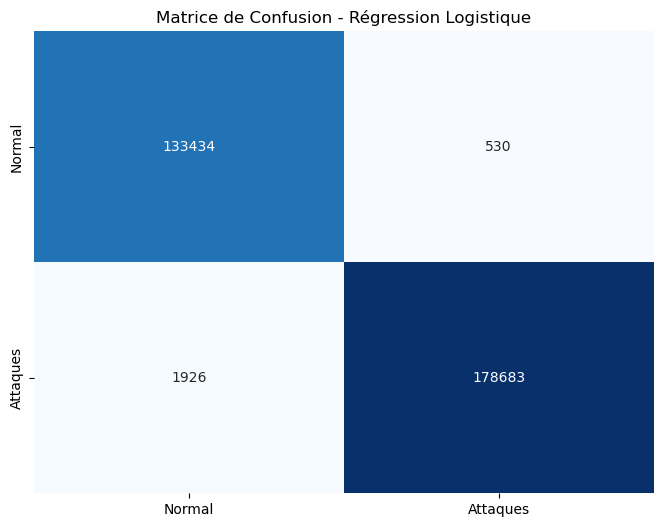

In [24]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Affichage de la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Régression Logistique')
plt.show

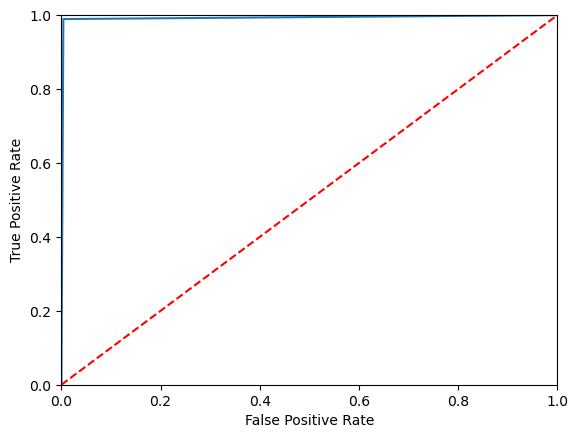

Area Under the Curve  0.9926898964168771


In [25]:
# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % logistic_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', logistic_auc)

## 2. modele Random forest

In [26]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9999936421752662
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    133964
           1       1.00      1.00      1.00    180609

    accuracy                           1.00    314573
   macro avg       1.00      1.00      1.00    314573
weighted avg       1.00      1.00      1.00    314573


Recall  1.0
F1- Score   0.9999944632080172

Temps d'exécution Détection de primitives : 318.12364745140076 secondes


[[133962      2]
 [     0 180609]]


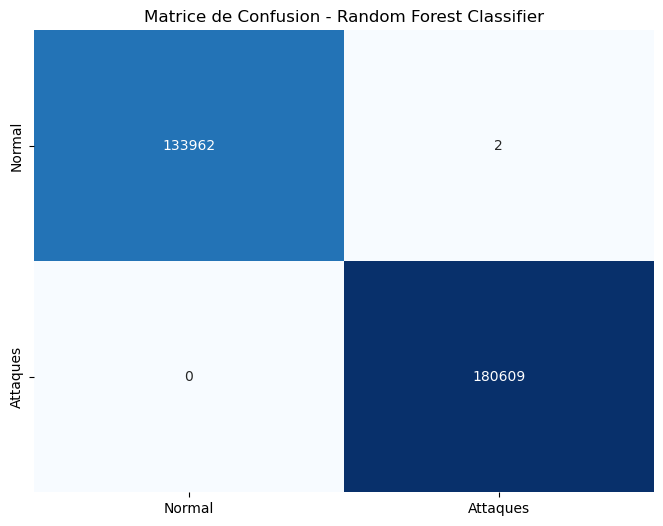

In [27]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Random Forest Classifier')
plt.show()

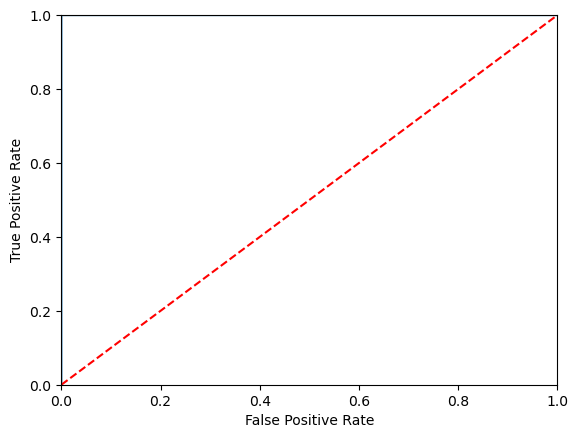

Area Under the Curve  0.9999925353079933


In [28]:
# Calculate AUC
RandomForest_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % RandomForest_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', RandomForest_auc)

# 3. modele Decision Tree

In [32]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the decision tree
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
# Predict on the test set
DecisionTree_pred = DecisionTree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
report = classification_report(y_test, DecisionTree_pred)
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9999109904537261
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    133964
           1       1.00      1.00      1.00    180609

    accuracy                           1.00    314573
   macro avg       1.00      1.00      1.00    314573
weighted avg       1.00      1.00      1.00    314573


Recall  0.9999169476604156
F1- Score   0.9999224840538625

Temps d'exécution Détection de primitives : 39.948105335235596 secondes


[[133951     13]
 [    15 180594]]


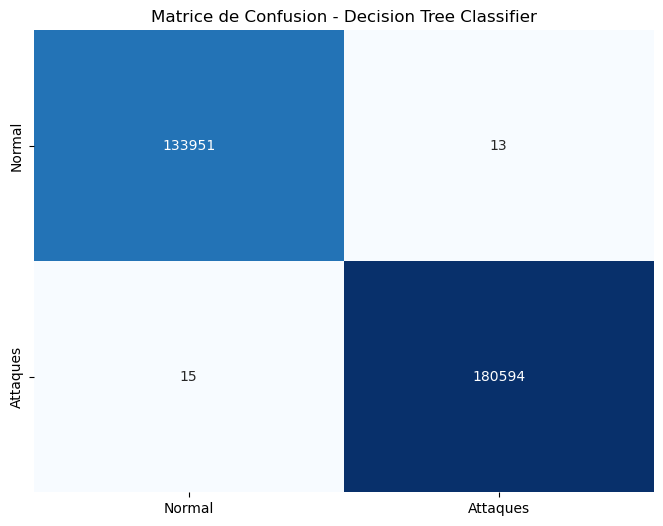

In [33]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Decision Tree Classifier')
plt.show()

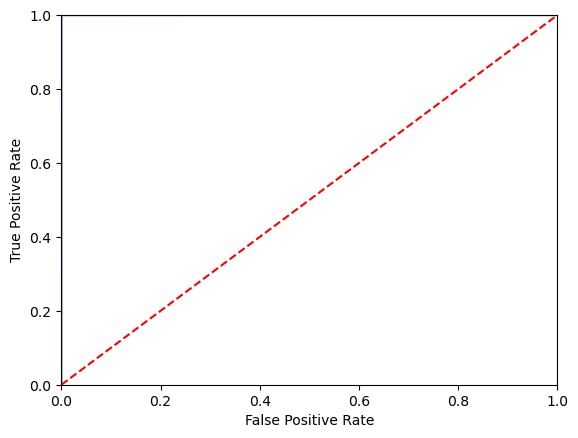

Area Under the Curve  0.9999099533321636


In [34]:
# Calculate AUC
DecisionTree_auc = roc_auc_score(y_test, DecisionTree_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, DecisionTree_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % DecisionTree_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', DecisionTree_auc)

## 4. Modele Support Vector Machines

In [36]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.99201457213429
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    133964
           1       0.99      1.00      0.99    180609

    accuracy                           0.99    314573
   macro avg       0.99      0.99      0.99    314573
weighted avg       0.99      0.99      0.99    314573


Recall  0.996772032401486
F1- Score   0.9930715680541917

Temps d'exécution Détection de primitives : 19354.968323230743 secondes


[[132035   1929]
 [   583 180026]]


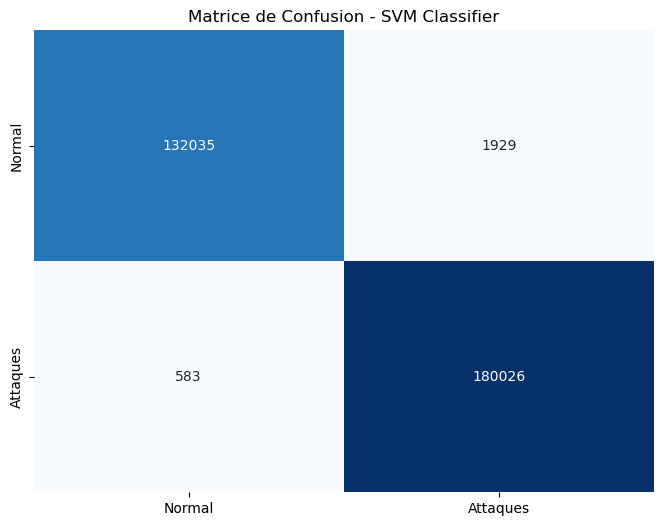

In [37]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

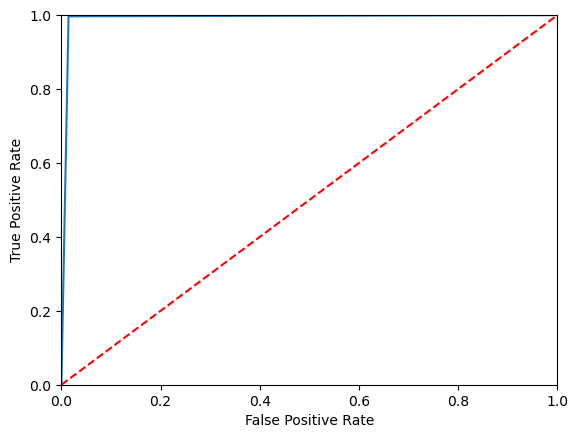

Area Under the Curve  0.9911863207601769


In [38]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

## 5. modele XGBCLASSIFIER

In [30]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9999936421752662
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    133964
           1       1.00      1.00      1.00    180609

    accuracy                           1.00    314573
   macro avg       1.00      1.00      1.00    314573
weighted avg       1.00      1.00      1.00    314573


Recall  1.0
F1- Score   0.9999944632080172

Temps d'exécution Détection de primitives : 22.066335916519165 secondes


[[133962      2]
 [     0 180609]]


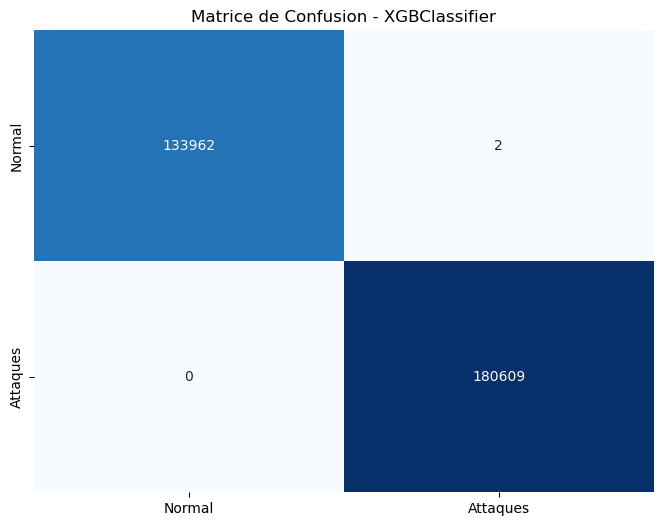

In [31]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - XGBClassifier')
plt.show()

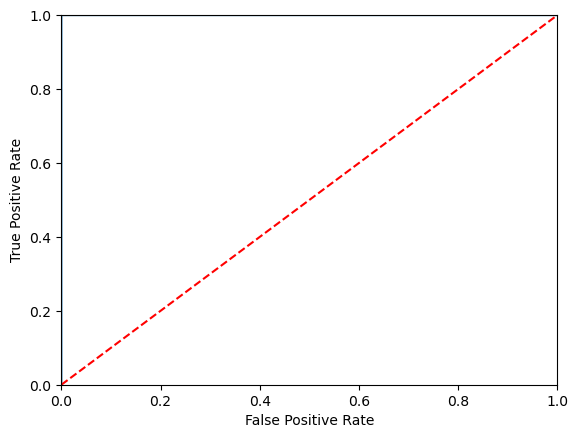

Area Under the Curve  0.9999925353079933


In [32]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, xgb_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

# Exemple

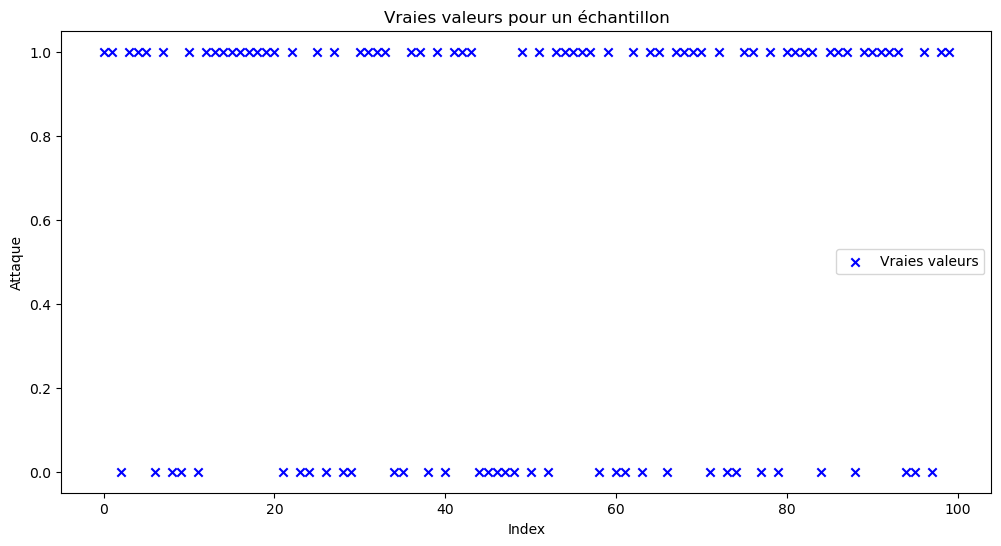

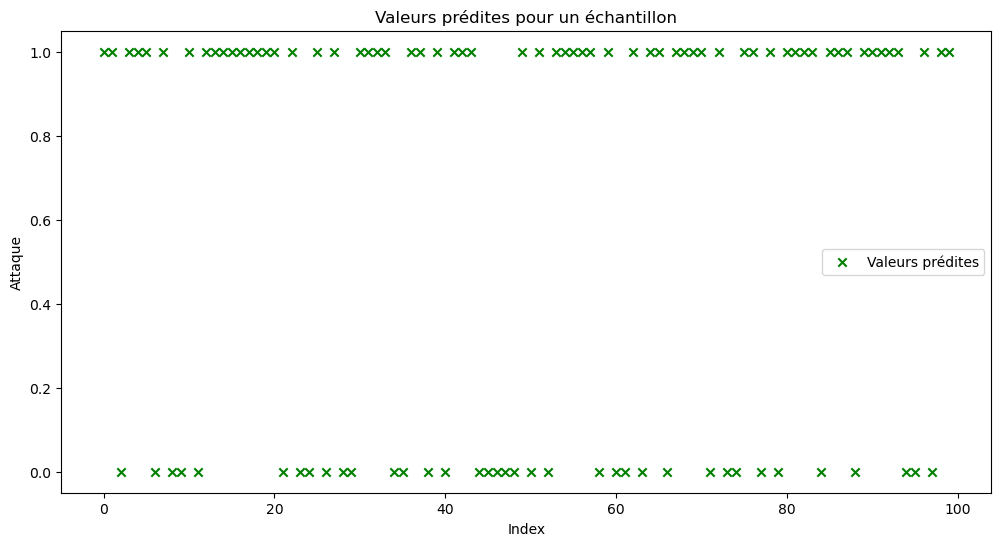

In [35]:
# Sélectionner un échantillon aléatoire de 1000 lignes
random_sample = train.sample(n=100, random_state=42)
# Séparer les caractéristiques (X) et la variable cible (y)
X_sample = random_sample.drop("Labels", axis=1)
y_sample = random_sample["Labels"]

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
y_pred_all = xgb_model.predict(X_test)

# Ajouter les colonnes des prédictions au DataFrame de l'ensemble de test
df_test_predictions = X_test.copy()
df_test_predictions['Real'] = y_test
df_test_predictions['Predictions_XGBClassifier'] = y_pred_all
# Sélectionner un échantillon aléatoire de 300 lignes dans l'ensemble de test
random_subset = df_test_predictions.sample(n=100, random_state=42)
# Plot pour les vraies valeurs
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Real'], label='Vraies valeurs', marker='x', color='blue')
plt.title('Vraies valeurs pour un échantillon')
plt.xlabel('Index')
plt.ylabel('Attaque')
plt.legend()
plt.show()
# Plot pour les valeurs prédites
plt.figure(figsize=(12, 6))
plt.scatter(range(len(random_subset)), random_subset['Predictions_XGBClassifier'], label='Valeurs prédites', marker='x', color='green')
plt.title('Valeurs prédites pour un échantillon')
plt.xlabel('Index')
plt.ylabel('Attaque')
plt.legend()
plt.show()

# Comparaison

comparaison valeur accuracy


<BarContainer object of 5 artists>

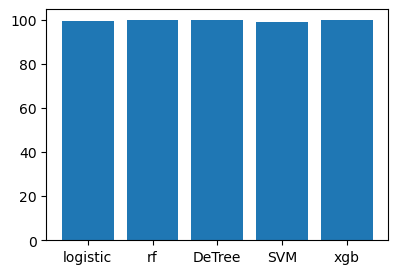

In [3]:
print ("comparaison valeur accuracy")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [99.7, 99.9, 99.8, 99.2, 99.9] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

comparaison temps d'execution


<BarContainer object of 5 artists>

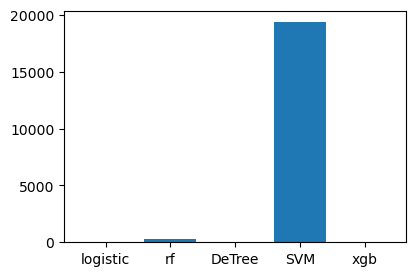

In [4]:
print ("comparaison temps d'execution")
names = ['logistic', 'rf', 'DeTree', 'SVM', 'xgb'] 
values = [43.7, 318, 39.9, 19354.81, 22.585] 
f = plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values)

# Reduction nombre colonnes

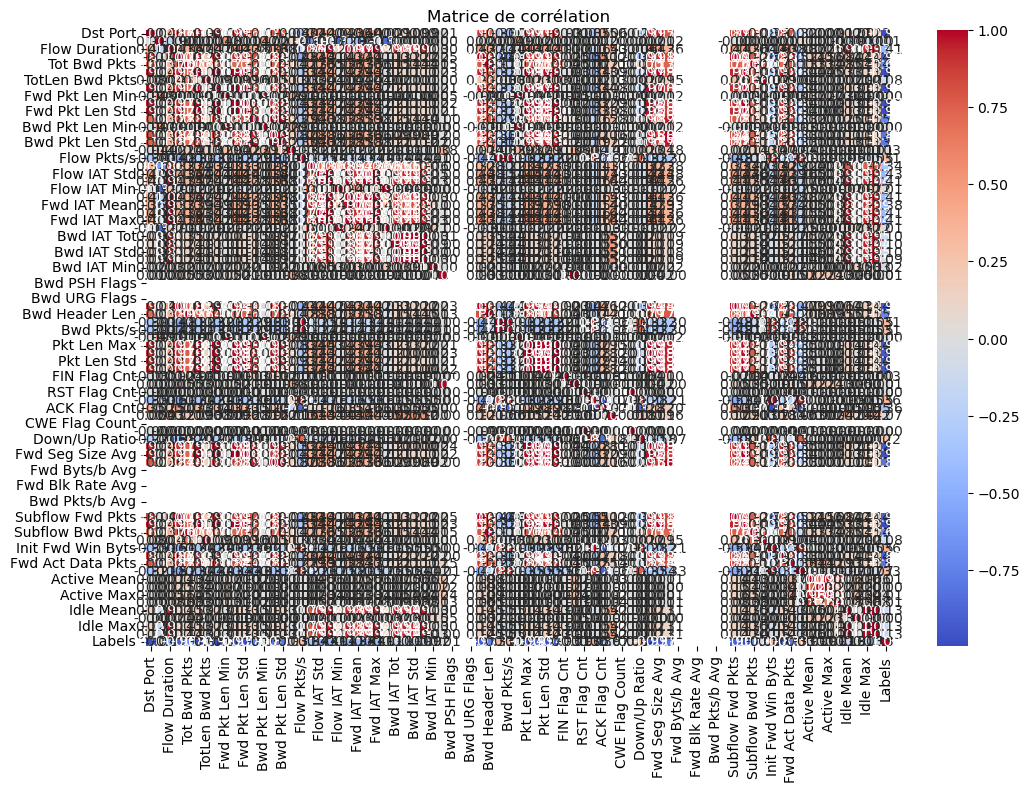

In [20]:
# Calculer la matrice de corrélation
correlation_matrix = train.corr()
# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [21]:
# Définir le seuil de corrélation
threshold = 0.2

# Extraire les colonnes ayant une corrélation absolue supérieure au seuil avec la variable cible
target_correlation = correlation_matrix['Labels'].abs()
relevant_features = target_correlation[target_correlation > threshold]

# Sélectionner les colonnes pertinentes
relevant_columns = relevant_features.index.tolist()

# Calculer les colonnes à supprimer
columns_to_drop = [col for col in train.columns if col not in relevant_columns]

# Supprimer les colonnes non pertinentes
data_filtered = train.drop(columns=columns_to_drop)

# Afficher les colonnes sélectionnées
print("Colonnes sélectionnées :\n", relevant_columns)
print("\nColonnes supprimées :\n", columns_to_drop)

# Afficher les premières lignes du DataFrame filtré
print("\nDataFrame filtré :\n", data_filtered.head())

Colonnes sélectionnées :
 ['Dst Port', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Labels']

Colonnes supprimées :
 ['Protocol', 'TotLen Bwd Pkts', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Flow Byts/s', 'Flow IAT Min', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'B

In [22]:
train.shape

(1048574, 79)

In [23]:
data_filtered.shape

(1048574, 41)

# XGBClassifier

In [42]:
#separation jeu d'entrainement et de test
X = data_filtered.drop(columns=['Labels'])
y = data_filtered['Labels'] 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=25)
#MODELISATION
start = time.time()
start_time = time.time()

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9999936421752662
[[133962      2]
 [     0 180609]]
Temps d'exécution Détection de primitives : 11.358780145645142 secondes


# Logistic Regression

In [43]:
#MODELISATION
start = time.time()
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, logistic_predictions)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9706681755904035
[[133769    195]
 [  9032 171577]]
Temps d'exécution Détection de primitives : 15.039597511291504 secondes


# Random Forest

In [44]:
#MODELISATION
start = time.time()
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9999936421752662
[[133962      2]
 [     0 180609]]
Temps d'exécution Détection de primitives : 134.7660059928894 secondes


# Decision Tree

In [45]:
#MODELISATION
start = time.time()
start_time = time.time()
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
DecisionTree_pred = DecisionTree.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9999046326289923
[[133951     13]
 [    17 180592]]
Temps d'exécution Détection de primitives : 5.5899834632873535 secondes


# SVM

In [24]:
#MODELISATION
start = time.time()
start_time = time.time()
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time
# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.99201457213429
[[132035   1929]
 [   583 180026]]
Temps d'exécution Détection de primitives : 18698.19575238228 secondes
